# Lecture 3: Autodiff in JAX

In [1]:
import jax
import jax.numpy as np
from jax import grad, vmap

import matplotlib.pyplot as plt

In [2]:
jax.print_environment_info()

jax:    0.4.24
jaxlib: 0.4.24
numpy:  1.23.5
python: 3.10.9 (main, Mar  8 2023, 10:47:38) [GCC 11.2.0]
jax.devices (1 total, 1 local): [CpuDevice(id=0)]
process_count: 1


In [3]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [4]:
sigmoid(0.0)

Array(0.5, dtype=float32, weak_type=True)

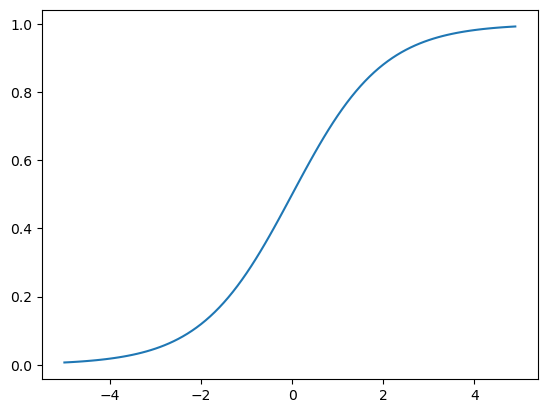

In [5]:
xs = np.arange(-5, 5, 0.1)
plt.plot(xs, sigmoid(xs))
plt.show()

In [6]:
from jax import make_jaxpr
make_jaxpr(sigmoid)(1.0)

{ lambda ; a:f32[]. let
    b:f32[] = neg a
    c:f32[] = exp b
    d:f32[] = add 1.0 c
    e:f32[] = div 1.0 d
  in (e,) }

In [17]:
# f = sigmoid
f = np.tanh
fp = grad(f)

In [18]:
fp(0.0)

Array(1., dtype=float32, weak_type=True)

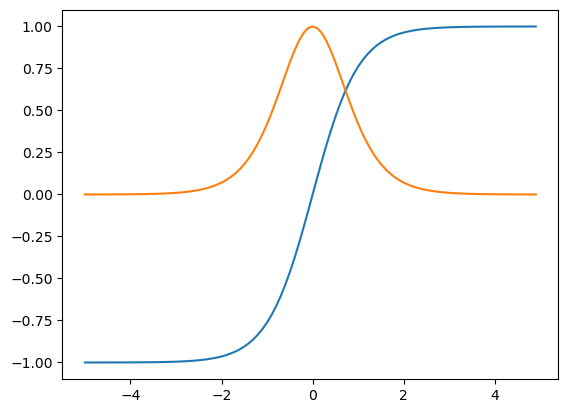

In [19]:
v_fp = vmap(fp)

xs = np.arange(-5, 5, 0.1)
plt.plot(xs, f(xs))
plt.plot(xs, v_fp(xs))
plt.show()

In [20]:
make_jaxpr(fp)(1.0)

{ lambda ; a:f32[]. let
    b:f32[] = tanh a
    c:f32[] = sub 1.0 b
    d:f32[] = mul 1.0 c
    e:f32[] = mul d b
    f:f32[] = add_any d e
  in (f,) }

In [21]:
fpp = grad(fp)
fppp = grad(fpp)

In [22]:
fpp(0.0)

Array(0., dtype=float32, weak_type=True)

In [23]:
fppp(0.0)

Array(-2., dtype=float32, weak_type=True)

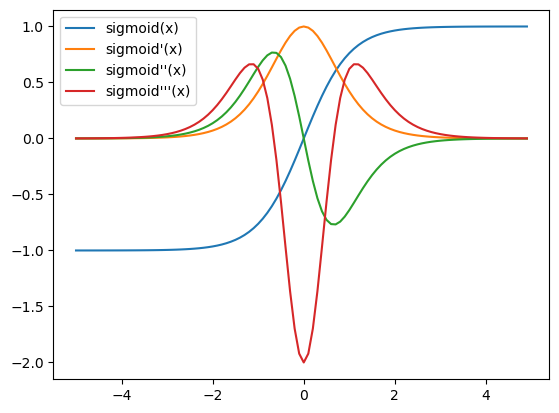

In [24]:
v_fpp = vmap(fpp)
v_fppp = vmap(fppp)

xs = np.arange(-5, 5, 0.1)
plt.plot(xs, f(xs), label="sigmoid(x)")
plt.plot(xs, v_fp(xs), label="sigmoid'(x)")
plt.plot(xs, v_fpp(xs), label="sigmoid''(x)")
plt.plot(xs, v_fppp(xs), label="sigmoid'''(x)")
plt.legend()
plt.show()

In [15]:
make_jaxpr(fpp)(0.0)

{ lambda ; a:f32[]. let
    b:f32[] = neg a
    c:f32[] = exp b
    d:f32[] = add 1.0 c
    _:f32[] = div 1.0 d
    _:f32[] = integer_pow[y=-2] d
    e:f32[] = integer_pow[y=-2] d
    f:f32[] = integer_pow[y=-3] d
    g:f32[] = mul -2.0 f
    h:f32[] = mul 1.0 e
    i:f32[] = mul h 1.0
    j:f32[] = neg i
    k:f32[] = mul j c
    _:f32[] = neg k
    l:f32[] = neg 1.0
    m:f32[] = mul j l
    n:f32[] = mul l c
    o:f32[] = neg n
    p:f32[] = mul o 1.0
    q:f32[] = mul 1.0 p
    r:f32[] = mul q g
    s:f32[] = add_any m r
    t:f32[] = mul s c
    u:f32[] = neg t
  in (u,) }

In [16]:
make_jaxpr(fppp)(0.0)

{ lambda ; a:f32[]. let
    b:f32[] = neg a
    c:f32[] = exp b
    d:f32[] = add 1.0 c
    _:f32[] = div 1.0 d
    _:f32[] = integer_pow[y=-2] d
    _:f32[] = integer_pow[y=-2] d
    e:f32[] = integer_pow[y=-3] d
    _:f32[] = mul -2.0 e
    f:f32[] = integer_pow[y=-2] d
    g:f32[] = integer_pow[y=-3] d
    h:f32[] = mul -2.0 g
    i:f32[] = integer_pow[y=-3] d
    j:f32[] = integer_pow[y=-4] d
    k:f32[] = mul -3.0 j
    l:f32[] = mul -2.0 i
    m:f32[] = mul 1.0 f
    n:f32[] = mul m 1.0
    o:f32[] = neg n
    p:f32[] = mul o c
    _:f32[] = neg p
    q:f32[] = neg 1.0
    r:f32[] = mul o q
    s:f32[] = mul q c
    t:f32[] = neg s
    u:f32[] = mul t 1.0
    v:f32[] = mul 1.0 u
    w:f32[] = mul v l
    x:f32[] = add_any r w
    y:f32[] = mul x c
    _:f32[] = neg y
    z:f32[] = neg 1.0
    ba:f32[] = mul x z
    bb:f32[] = mul z c
    bc:f32[] = mul v bb
    bd:f32[] = mul bb l
    be:f32[] = mul 1.0 bd
    bf:f32[] = mul be 1.0
    bg:f32[] = neg bf
    bh:f32[] = mul q bg
  